In [1]:
import sys
sys.path.insert(0 , '/home/arpit/study/ML/github')

In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
ram_prices = pd.read_csv("data/ram_price.csv")

In [4]:
print("Information about the data : \n" , ram_prices.columns)
print("Some of the data is : \n" , ram_prices.head())

Information about the data : 
 Index(['Unnamed: 0', 'date', 'price'], dtype='object')
Some of the data is : 
    Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0


Text(0,0.5,'Price in $/MByte')

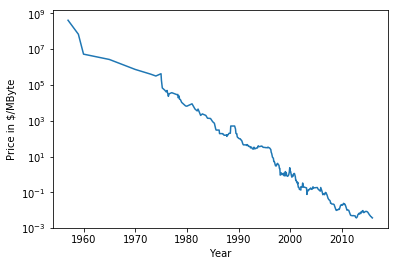

In [5]:
#plotting the graph
#semilogy is the same graph , just the y-axis have the logarithmic scale
#When plotting logarithmicaly , the relation is quite linear and easy to predict
plt.semilogy(ram_prices.date , ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/MByte")

In [6]:
#Implementing the decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [7]:
#splitting the data set
#taking the data set upto 2000 and then making prediction for the rest of the datapoint
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
X_train = data_train.date[: , np.newaxis ] #this is used to create the column vector , if np.newaxis is used with row , then it will produce a row vector
y_train = np.log(data_train.price)

#training and test set size
print("Shape of X_train : " , X_train.shape )           #X_train is a 2D matrix
print("Shape of y_train : " , y_train.shape)            #y_train is an array

Shape of X_train :  (202, 1)
Shape of y_train :  (202,)


In [8]:
#training the data set
tree = DecisionTreeRegressor().fit(X_train , y_train)
linear_reg = LinearRegression().fit(X_train , y_train)

In [9]:
#now going to predict on all the data
X_all = ram_prices.date[: , np.newaxis]
pred_tree = tree.predict(X_all)
pred_lin = linear_reg.predict(X_all)

#undo the log transform
price_tree = np.exp(pred_tree)
price_lin = np.exp(pred_lin)

#note in the overall model we first converted the price to logarithmic scale
#then after fitting the model , we create the exponent of the prices to undo the log

Text(0,0.5,'Price')

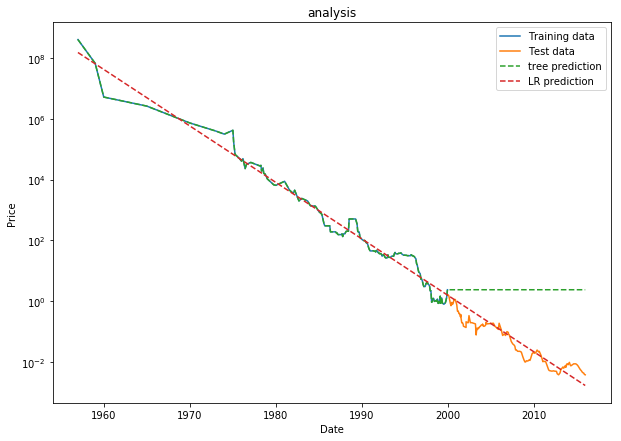

In [10]:
#plotting the graph
plt.figure(figsize = (10 , 7))
plt.semilogy(data_train.date , data_train.price , label = 'Training data')
plt.semilogy(data_test.date , data_test.price , label = 'Test data')
plt.semilogy(ram_prices.date , price_tree , '--' ,label = 'tree prediction')
plt.semilogy(ram_prices.date, price_lin , '--' , label = 'LR prediction ')
plt.legend()
plt.title('analysis')
plt.xlabel('Date')
plt.ylabel('Price')

#one of the intresting observation is linear model fit the training and test data quite greatly
#tree model fits the training data perfectly , as there is no limitation on the tree size
#But tree model cannot be used to make prediction outside the range

In [20]:
#visualising the tree
from sklearn.tree import export_graphviz
export_graphviz (tree , out_file = "tree3.dot",impurity = False , filled = True)

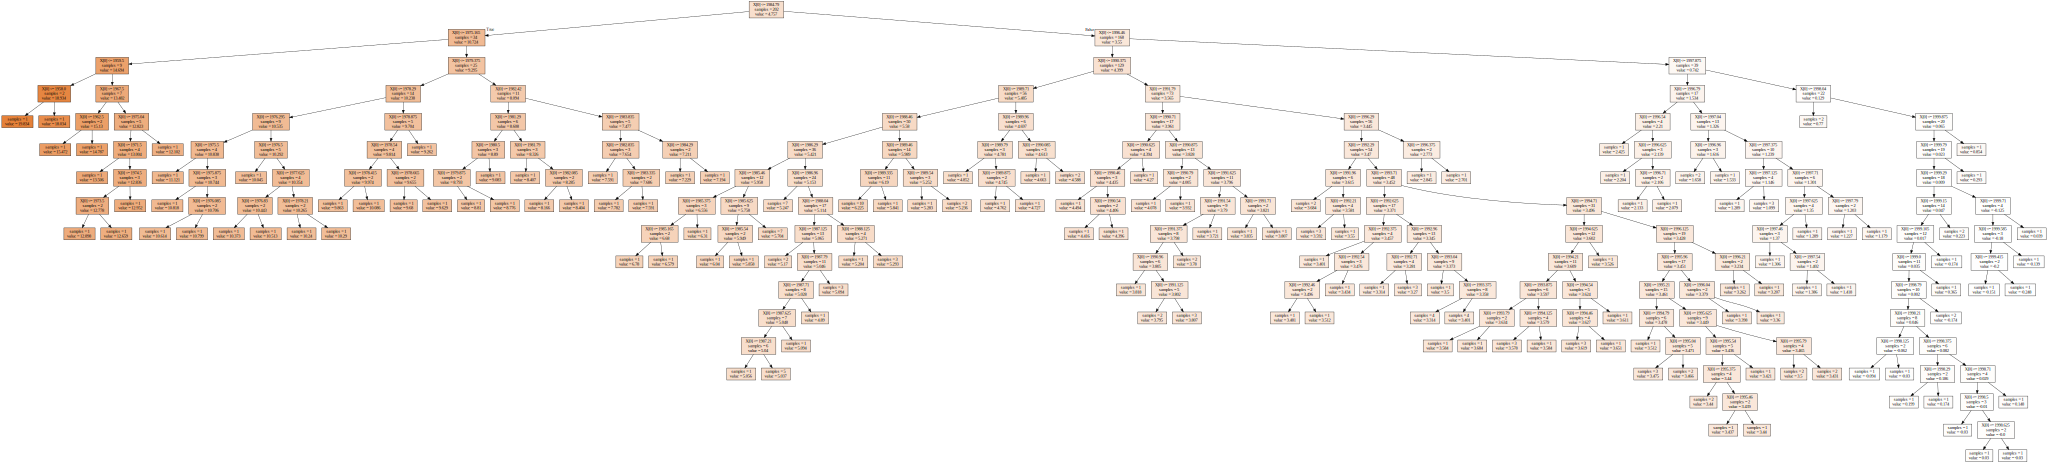

In [21]:
#visualising the tree
import graphviz
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)